# k-최근접 이웃 알고리즘 (k-nearest neighbors)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import inspect

In [25]:
from matplotlib import rc, font_manager
import matplotlib.pyplot as plt
# import inspect
# print(inspect.getfile(font_manager))
# print(inspect.getfile(plt))

# path = 'C:/Windows/Fonts/malgun.ttf'
# font_name = font_manager.FontProperties(fname = path).get_name()
# rc('font', family = font_name)
# 한글폰트 지정 in matplot
plt.rc('font', family='NanumGothic')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

### 도미자료와 방어자료 불러오기

In [8]:
# 도미자료
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 방어자료
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


### 요약 통계량

In [12]:
# 요약 통계량
print("도미길이 평균 = ", round(np.mean(bream_length), ndigits = 2))
print("방어길이 평균= ", round(np.mean(smelt_length), ndigits = 2))
print()
print("도미무게 평균= ", round(np.mean(bream_weight), ndigits = 2))
print("방어무게 평균= ", round(np.mean(bream_weight), ndigits = 2))

도미길이 평균 =  33.11
방어길이 평균=  11.92

도미무게 평균=  617.83
방어무게 평균=  11.18


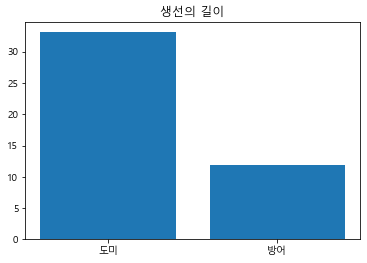

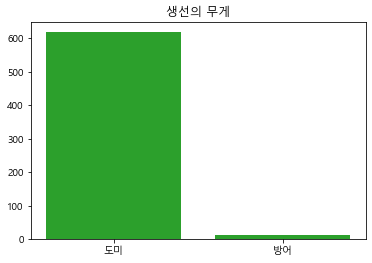

In [23]:
plt.bar([1, 2], [np.mean(bream_length), np.mean(smelt_length)])
plt.title('생선의 길이')
plt.xticks([1, 2], labels=['도미', '방어'])
plt.show()

plt.bar([1, 2], [np.mean(bream_weight), np.mean(smelt_length)], color = 'C2')
plt.title('생선의 무게')
plt.xticks([1, 2], labels=['도미', '방어'])
plt.show()

### 산점도 그리기

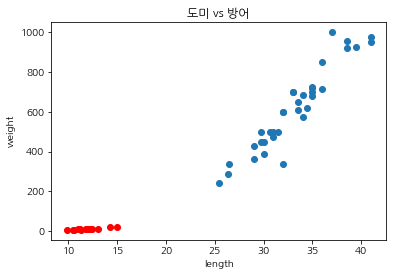

In [26]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight, c = "r")
plt.xlabel('length')
plt.ylabel('weight')
plt.title("도미 vs 방어")
plt.show() # plot all open figures

### list 자료를 sklearn 입력 형식에 맞게 수정

In [29]:
## Add two list 
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [31]:
## zip function을 이용해서 1차원 list 자료를 2차원 list 자료로 변환 
# fish_data_0 = [[l, w] for l, w in zip(length, weight)]
# fish_target_0 = [1]*35 + [0]*14

## column stack
fish_data = np.column_stack((length, weight))
print(fish_data[:10,])

## using np.append
fish_target = np.append(np.ones(35), np.zeros(14))
print(fish_target)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]
 [ 29.7 450. ]
 [ 29.7 500. ]
 [ 30.  390. ]
 [ 30.  450. ]
 [ 30.7 500. ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### Training set과 Test set 나누기

In [37]:
from sklearn.model_selection import train_test_split
# inspect.getfile(train_test_split)
# default test_size = 0.25
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, test_size = 0.3)

### z 표준화 하기

In [39]:
mean = np.mean(train_input)
std = np.std(train_input)
print('평균은 ={0}, 표준편차 = {1}'.format(mean, std))

train_scaled = (train_input - mean)/std
test_scaled = (test_input - mean) / std

평균은 =232.76764705882354, 표준편차 = 314.462751671134


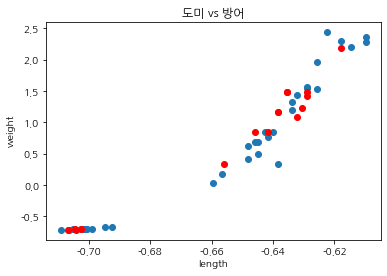

In [41]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(test_scaled[:, 0], test_scaled[:, 1], c = "r")
plt.xlabel('length')
plt.ylabel('weight')
plt.title("도미 vs 방어")
plt.show() # plot all open figures

### KNN 분석을 위한 ML module import

In [42]:
from sklearn.neighbors import KNeighborsClassifier

### knn 객체 생성

In [43]:
# 클래스 객체 만들기/ learning parameter setting
# n_neighbors : int, default=5
kn = KNeighborsClassifier(n_neighbors = 5)

### knn 모델 훈련

In [44]:
# ML learning
kn.fit(train_scaled, train_target)

1.0

In [47]:
# sklearn classification mean accuracy
print('train 정확도 = \n', kn.score(train_scaled, train_target))
print('test 정확도 = \n',kn.score(test_scaled, test_target))

train 정확도 = 
 1.0
test 정확도 = 
 1.0


### knn 예측

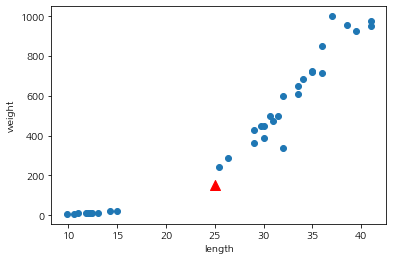

In [55]:
# Finds the K-neighbors of a point.

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker ="^", c = "r", s = 100)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### Finds the K-neighbors of a point

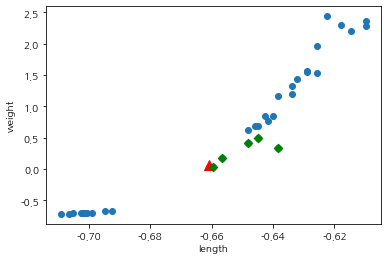

In [63]:
# Finds the K-neighbors of a point.

new = ([25, 250] - mean)/std
distance, index = kn.kneighbors([new])


plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker ="^", c = "r", s = 100)
plt.scatter(train_scaled[index, 0], train_scaled[index, 1],
            marker = "D", c = "g")

plt.xlabel('length')
plt.ylabel('weight')
plt.show()